# topic name : outlier dections (z-score)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r"C:\Users\mdfir\Downloads\placement (2).csv")

In [4]:
data

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


C:\Users\mdfir\AppData\Local\Temp\ipykernel_11184\4020287777.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["cgpa"])
C:\Users\mdfir\AppData\Local\Temp\ipykernel_11184\4020287777.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["placement_exam_marks"])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

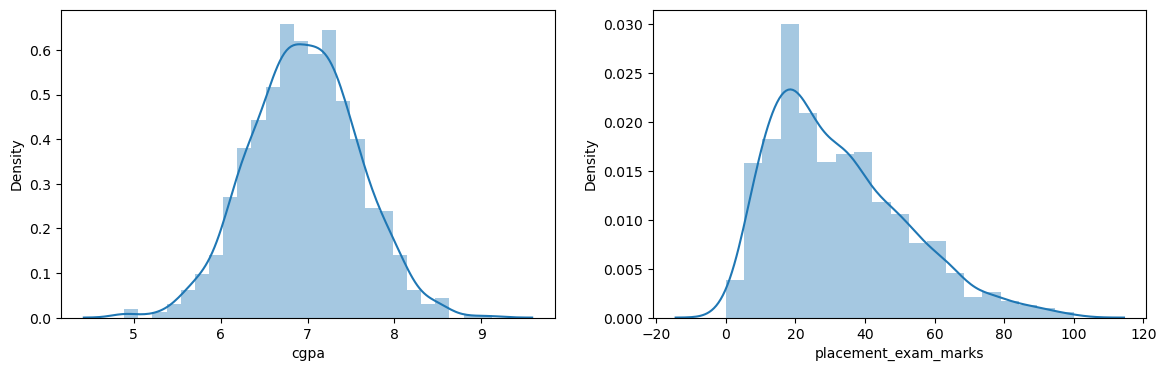

In [5]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(data["cgpa"])


plt.subplot(122)
sns.distplot(data["placement_exam_marks"])

In [6]:
data.mean()

cgpa                     6.96124
placement_exam_marks    32.22500
placed                   0.48900
dtype: float64

In [7]:
data.std()

cgpa                     0.615898
placement_exam_marks    19.130822
placed                   0.500129
dtype: float64

In [8]:
data.min()

cgpa                    4.89
placement_exam_marks    0.00
placed                  0.00
dtype: float64

In [9]:
data.max()

cgpa                      9.12
placement_exam_marks    100.00
placed                    1.00
dtype: float64

# find higher and lower limit

In [11]:
higher_limit=data["cgpa"].mean()+3*data["cgpa"].std()
lower_limit=data["cgpa"].mean()-3*data["cgpa"].std()

In [60]:
higher_limit,lower_limit

(8.808933625397168, 5.113546374602832)

# fiting the ouliers

In [31]:
data[(data["cgpa"]>higher_limit)| (data["cgpa"]<lower_limit)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# trimming 

In [33]:
new_data=data[(data["cgpa"]<higher_limit) & (data["cgpa"]>lower_limit)] 

In [16]:
new_data

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


# cappind 

In [39]:
higher_limit=data["cgpa"].mean()+3*data["cgpa"].std()
lower_limit=data["cgpa"].mean()-3*data["cgpa"].std()

In [43]:
data["cgpa"]=np.where(
data["cgpa"]>higher_limit,
    higher_limit,
    
np.where(data["cgpa"]<lower_limit,
        lower_limit,
        data["cgpa"]))

In [47]:
data["cgpa"].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

# check the data 

In [56]:
data[(data["cgpa"]>higher_limit )|(data["cgpa"]<lower_limit)]

,cgpa,placement_exam_marks,placed
